# IPL Batting and Bowling Analysis (2016-2022)

## What is the IPL?

IPL stands for the Indian Premier League and is a professional men's Twenty20 cricket league hosted in India. The competition consists pf 10 teams and the ultimate goal is to win the championship at the end of each season. The league is franchised and hosts players from all around the world with the main pool of players coming from India. 

The data used in this notebook can be accessed here: https://www.kaggle.com/datasets/anandkumarsahu09/ipl-player-stats-20162022. The data consists of batting statistics for each season from 2016 to 2022 along with the bowling statistics for the same seasons.

The ultimate goal of this notebook is to analyze the bowling and batting statistics to identify some of the best T20 batsmen and bowlers in this competition. 

## How to identify the best T20 batsmen and T20 bowler?

There is a huge amount of contention about how to decide who the best players are however I am going to use a statistical non-biased approach in this notebook. So for a bit of context, T20 cricket is one of the shortest formats of cricket being played around the world. Historically, Test cricket was considered the original format for cricket and it was fairly straightforward on how to identify the best batsman and bowler.

You simply had to look at who scored the most runs to determine the best batsman and who had the most wickets for the best bowler. These are ultimately the most imporant metric in cricket since a batsman's job is to score runs and a bowler's job is to take wickets. We could simply use this same logic for T20 cricket however we will fail to acknowledge a core difference between the 2 formats being discussed.

Test cricket is played over the course of 5 days and each day has 90 overs. What this means is that batsmen are not pressured to score runs at a quick pace leading to strike rates and boundaries scored to be a non factor in the measure of a great batsman. 
Also, the amount of landmarks scored (50s or 100s) were a lot easier to come by simply because facing more balls gives you more opportunities to score more runs.

Now comparing that to modern T20 cricket which has a limit of 20 overs per side, we cannot simply look at runs only to determine a great T20 batsman. If a person has a lot of runs but has a poor strike rate, then they may do more harm to their team's performance than good. For example, a par score in modern T20 cricket is 150. A person that scores 80 runs off of 90 balls in a T20 game means that the team has 30 balls to score the remaining 70 runs to get to par. This hurts the team much more than a person who scores 60 runs off of 40 balls. This will mean the team has 80 balls to score at least 90 runs. 

So for me to identify the statistical best T20 batsmen, I will factor in strike rate, boundaries scored (since this directly impacts strike rate and batsmen's efficiency), landmarks scored (a lesser factor but significantly helps teams when scored at a good strike rate), average, and finally total runs scored. 

Likewise for a bowler, I will factor in strike rate (number of balls bowled per wicket), economy rate (how much runs does a bowler allow in a single over on average), average (the runs to wicket ratio), landmarks (number of 4 wicket and 5 wicket hauls), and finally wickets to determine the best T20 bowlers.

### 1. Import the data into the notebook. 
First I will define a function to load in data given a file path and a filename.

In [1]:
import os
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
warnings.filterwarnings("ignore")


def load_data(file_path , filename):
    
    csv_path = os.path.join(file_path, filename)
    return pd.read_csv(csv_path)

In [2]:
def write_csv_data(file_path, filename, df):
    csv_path = os.path.join(file_path, filename)
    df.to_csv(csv_path)
    
    if os.path.exists(csv_path) and os.path.getsize(csv_path) > 0:
        print(filename + " was written to successfully!")

#### 1a. Load in batting data
We will then call the function to load in all batting data.

In [3]:
batting_file_path = "Data/Batting_Stats"


# All batting dataframes
df_batting_2016 = load_data(batting_file_path, "BATTING_STATS-IPL_2016.csv")
df_batting_2017 = load_data(batting_file_path, "BATTING_STATS-IPL_2017.csv")
df_batting_2018 = load_data(batting_file_path, "BATTING_STATS-IPL_2018.csv")
df_batting_2019 = load_data(batting_file_path, "BATTING_STATS-IPL_2019.csv")
df_batting_2020 = load_data(batting_file_path, "BATTING_STATS-IPL_2020.csv")
df_batting_2021 = load_data(batting_file_path, "BATTING_STATS-IPL_2021.csv")
df_batting_2022 = load_data(batting_file_path, "BATTING_STATS-IPL_2022.csv")



#### 1b. Load in bowling data
We will then call the function to load in all bowling data.

In [4]:
bowling_file_path = "Data/Bowling_Stats"

# All bowling dataframes
df_bowling_2016 = load_data(bowling_file_path, "BOWLING_STATS-IPL_2016.csv")
df_bowling_2017 = load_data(bowling_file_path, "BOWLING_STATS-IPL_2017.csv")
df_bowling_2018 = load_data(bowling_file_path, "BOWLING_STATS-IPL_2018.csv")
df_bowling_2019 = load_data(bowling_file_path, "BOWLING_STATS-IPL_2019.csv")
df_bowling_2020 = load_data(bowling_file_path, "BOWLING_STATS-IPL_2020.csv")
df_bowling_2021 = load_data(bowling_file_path, "BOWLING_STATS-IPL_2021.csv")
df_bowling_2022 = load_data(bowling_file_path, "BOWLING_STATS-IPL_2022.csv")

### 2. Take a first look at the dataframes
We will use some basic dataframe commands to inspect the content.

In [5]:
df_batting_2022.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83,45
1,2,KL Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45,30
2,3,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47,23
3,4,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49,12
4,5,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51,11


In [6]:
df_bowling_2022.head()

,POS,Player,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1,Yuzvendra Chahal,17,17,68.0,527,27,40/5,19.51,7.75,15.11,1,1
1,2,Wanindu Hasaranga,16,16,57.0,430,26,18/5,16.53,7.54,13.15,1,1
2,3,Kagiso Rabada,13,13,48.0,406,23,33/4,17.65,8.45,12.52,2,0
3,4,Umran Malik,14,14,49.1,444,22,25/5,20.18,9.03,13.40,1,1
4,5,Kuldeep Yadav,14,14,49.4,419,21,14/4,19.95,8.43,14.19,2,0


### 2a. Info function analysis
Info function will give us details on whether any fields contain null values and after running the function on all dataframes, there doesn't seem to be any null values. This is very good.

We can see however that the highest score, average and BBI columns are all strings. This is a problem for the average column since it needs to be a float but BBI will always contain a slash and high score can contain an * to indicate not out. We will omit both BBI and High Score since it is not needed for later analysis.

In [7]:
df_batting_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     133 non-null    int64  
 1   Player  133 non-null    object 
 2   Mat     133 non-null    int64  
 3   Inns    133 non-null    int64  
 4   NO      133 non-null    int64  
 5   Runs    133 non-null    int64  
 6   HS      133 non-null    object 
 7   Avg     133 non-null    float64
 8   BF      133 non-null    int64  
 9   SR      133 non-null    float64
 10  100     133 non-null    int64  
 11  50      133 non-null    int64  
 12  4s      133 non-null    int64  
 13  6s      133 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 14.7+ KB


In [8]:
df_bowling_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     103 non-null    int64  
 1   Player  103 non-null    object 
 2   Mat     103 non-null    int64  
 3   Inns    103 non-null    int64  
 4   Ov      103 non-null    float64
 5   Runs    103 non-null    int64  
 6   Wkts    103 non-null    int64  
 7   BBI     103 non-null    object 
 8   Avg     103 non-null    float64
 9   Econ    103 non-null    float64
 10  SR      103 non-null    float64
 11  4w      103 non-null    int64  
 12  5w      103 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 10.6+ KB


### 3. Fix issues in the concatenated datasets
We need to address the BBI, High Score, and Average column for both batting and bowling data. I will create utility functions for each discipline to handle the cleaning in a functional way.

In [9]:
def cleanBattingData(df_batting):
    # Handles cleaning the Average column
    df_batting['Avg'] = df_batting['Avg'].astype(str)
    df_batting['Avg'] = df_batting['Avg'].str.replace("-", "0")
    df_batting['Avg'] = df_batting['Avg'].str.strip("")
    df_batting['Avg'] = df_batting['Avg'].astype('float64')

    # Removing unneeded * from High Score column
    df_batting['HS'] = df_batting['HS'].str.replace("*", "")
    
    # Dropping unneeded POS column
    df_batting.drop(['POS'], axis=1, inplace=True)
    
    return df_batting

In [10]:
df_clean_batting_2016 = cleanBattingData(df_batting_2016)
df_clean_batting_2017 = cleanBattingData(df_batting_2017)
df_clean_batting_2018 = cleanBattingData(df_batting_2018)
df_clean_batting_2019 = cleanBattingData(df_batting_2019)
df_clean_batting_2020 = cleanBattingData(df_batting_2020)
df_clean_batting_2021 = cleanBattingData(df_batting_2021)
df_clean_batting_2022 = cleanBattingData(df_batting_2022)


write_csv_data("Outputs\Cleaned_Datasets\Batting", "cleaned_batting_data_2016.csv", df_clean_batting_2016)
write_csv_data("Outputs\Cleaned_Datasets\Batting", "cleaned_batting_data_2017.csv", df_clean_batting_2017)
write_csv_data("Outputs\Cleaned_Datasets\Batting", "cleaned_batting_data_2018.csv", df_clean_batting_2018)
write_csv_data("Outputs\Cleaned_Datasets\Batting", "cleaned_batting_data_2019.csv", df_clean_batting_2019)
write_csv_data("Outputs\Cleaned_Datasets\Batting", "cleaned_batting_data_2020.csv", df_clean_batting_2020)
write_csv_data("Outputs\Cleaned_Datasets\Batting", "cleaned_batting_data_2021.csv", df_clean_batting_2021)
write_csv_data("Outputs\Cleaned_Datasets\Batting", "cleaned_batting_data_2022.csv", df_clean_batting_2022)

cleaned_batting_data_2016.csv was written to successfully!
cleaned_batting_data_2017.csv was written to successfully!
cleaned_batting_data_2018.csv was written to successfully!
cleaned_batting_data_2019.csv was written to successfully!
cleaned_batting_data_2020.csv was written to successfully!
cleaned_batting_data_2021.csv was written to successfully!
cleaned_batting_data_2022.csv was written to successfully!


In [11]:
def cleanBowlingData(df_bowling):
    # Dropping unneeded POS column
    df_bowling.drop(['POS'], axis=1, inplace=True)

    # Dropping unneeded BBI column
    df_bowling.drop(['BBI'], axis=1, inplace=True)
    
    return df_bowling

In [12]:
df_clean_bowling_2016 = cleanBowlingData(df_bowling_2016)
df_clean_bowling_2017 = cleanBowlingData(df_bowling_2017)
df_clean_bowling_2018 = cleanBowlingData(df_bowling_2018)
df_clean_bowling_2019 = cleanBowlingData(df_bowling_2019)
df_clean_bowling_2020 = cleanBowlingData(df_bowling_2020)
df_clean_bowling_2021 = cleanBowlingData(df_bowling_2021)
df_clean_bowling_2022 = cleanBowlingData(df_bowling_2022)


write_csv_data("Outputs\Cleaned_Datasets\Bowling", "cleaned_bowling_data_2016.csv", df_clean_bowling_2016)
write_csv_data("Outputs\Cleaned_Datasets\Bowling", "cleaned_bowling_data_2017.csv", df_clean_bowling_2017)
write_csv_data("Outputs\Cleaned_Datasets\Bowling", "cleaned_bowling_data_2018.csv", df_clean_bowling_2018)
write_csv_data("Outputs\Cleaned_Datasets\Bowling", "cleaned_bowling_data_2019.csv", df_clean_bowling_2019)
write_csv_data("Outputs\Cleaned_Datasets\Bowling", "cleaned_bowling_data_2020.csv", df_clean_bowling_2020)
write_csv_data("Outputs\Cleaned_Datasets\Bowling", "cleaned_bowling_data_2021.csv", df_clean_bowling_2021)
write_csv_data("Outputs\Cleaned_Datasets\Bowling", "cleaned_bowling_data_2022.csv", df_clean_bowling_2022)

cleaned_bowling_data_2016.csv was written to successfully!
cleaned_bowling_data_2017.csv was written to successfully!
cleaned_bowling_data_2018.csv was written to successfully!
cleaned_bowling_data_2019.csv was written to successfully!
cleaned_bowling_data_2020.csv was written to successfully!
cleaned_bowling_data_2021.csv was written to successfully!
cleaned_bowling_data_2022.csv was written to successfully!


### 3. Combine dataframes for all years into a single dataframe
We can combine the batting data and bowling data to represent all of the players' statistics regardless of the year they took place. This will give us a large enough dataset that we can analyze which will omit single season successes and allow us to get a holistic view of the best players over the course of the past few years. 

#### 3a. Combining and formatting batting data

In [13]:
def combineDataFramesWithSeasonCount(df_list):
    # This is used to concatenate the dataframes and count the number of seasons each player played by counting the duplicates
    df_season_count = pd.concat(df_list)['Player'].value_counts().reset_index()
    # We will rename the columns for the this dataframe to easily merge into the total dataframe
    df_season_count = df_season_count.rename(columns={"Player": "Seasons", "index": "Player"})
    
    # This concatenation will produce the actual total dataframe with unique entries for each player because of groupby
    df_all = pd.concat(df_list).groupby(['Player']).sum().reset_index()
    # We merge the season count into the total dataframe to add the Season column
    df_all_with_season_count = df_all.merge(df_season_count, on='Player', how='left')

    return df_all_with_season_count

In [14]:
def formatBattingCombined(df_batting_combined):
    # Will divide average and Strike Rate by number of seasons to get the average of these metrics across all seasons
    df_batting_combined['Avg'] = round(df_batting_combined['Avg'] / df_batting_combined['Seasons'],2)
    df_batting_combined['SR'] = round(df_batting_combined['SR'] / df_batting_combined['Seasons'],2)
    
    return df_batting_combined

In [15]:
batting_list = [df_clean_batting_2016, df_clean_batting_2017, df_clean_batting_2018, df_clean_batting_2019, df_clean_batting_2020
                , df_clean_batting_2021, df_clean_batting_2022]

df_batting_combined = combineDataFramesWithSeasonCount(batting_list)
df_batting_combined_formatted = formatBattingCombined(df_batting_combined)
write_csv_data("Outputs\Combined", "combined_and_formatted_batting.csv", df_batting_combined_formatted)

combined_and_formatted_batting.csv was written to successfully!


#### 3b. Combining and formatting bowling data

In [16]:
def formatBowlingCombined(df_bowling_combined):
    # Will divide average, economy and Strike Rate by number of seasons to get the average of these metrics across all seasons
    df_bowling_combined['Avg'] = round(df_bowling_combined['Avg'] / df_bowling_combined['Seasons'],2)
    df_bowling_combined['SR'] = round(df_bowling_combined['SR'] / df_bowling_combined['Seasons'],2)
    df_bowling_combined['Econ'] = round(df_bowling_combined['Econ'] / df_bowling_combined['Seasons'],2)
    
    return df_bowling_combined

In [17]:
bowling_list = [df_clean_bowling_2016, df_clean_bowling_2017, df_clean_bowling_2018, df_clean_bowling_2019, df_clean_bowling_2020
                , df_clean_bowling_2021, df_clean_bowling_2022]

df_bowling_combined = combineDataFramesWithSeasonCount(bowling_list)
df_bowling_combined_formatted = formatBowlingCombined(df_bowling_combined)
write_csv_data("Outputs\Combined", "combined_and_formatted_bowling.csv", df_bowling_combined_formatted)

combined_and_formatted_bowling.csv was written to successfully!


### 4. Extracting more detailed information about each dataset
We want to get a better feel for the data so we will use the describe method and info method again.

### 4a. Describe and info method on the batting dataset

In [23]:
df_batting_combined_formatted.describe()

,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s,Seasons
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,26.857567,19.569733,4.563798,394.115727,15.022463,296.833828,106.016053,0.118694,2.139466,34.694362,16.267062,2.982196
std,28.091430,24.868021,6.099102,695.644705,12.093089,509.400367,43.572306,0.554345,4.917911,64.515445,29.632670,2.052795
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.000000,3.000000,1.000000,15.000000,4.080000,19.000000,79.160000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,14.000000,9.000000,2.000000,67.000000,12.560000,57.000000,113.490000,0.000000,0.000000,5.000000,2.000000,2.000000
75%,42.000000,23.000000,6.000000,404.000000,23.780000,303.000000,132.870000,0.000000,2.000000,35.000000,18.000000,5.000000
max,110.000000,110.000000,42.000000,3663.000000,53.780000,2825.000000,400.000000,5.000000,32.000000,404.000000,156.000000,7.000000


In [27]:
df_batting_combined_formatted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 336
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   337 non-null    object 
 1   Mat      337 non-null    int64  
 2   Inns     337 non-null    int64  
 3   NO       337 non-null    int64  
 4   Runs     337 non-null    int64  
 5   Avg      337 non-null    float64
 6   BF       337 non-null    int64  
 7   SR       337 non-null    float64
 8   100      337 non-null    int64  
 9   50       337 non-null    int64  
 10  4s       337 non-null    int64  
 11  6s       337 non-null    int64  
 12  Seasons  337 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 36.9+ KB


### 4b. Describe and info method on the bowling dataset

In [24]:
df_bowling_combined_formatted.describe()

,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR,4w,5w,Seasons
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.00000,227.000000,227.000000,227.000000
mean,23.299559,21.409692,70.934361,583.088106,20.634361,37.658987,8.768899,25.61793,0.330396,0.061674,2.709251
std,23.777511,23.136656,82.979503,645.464175,25.048330,17.159497,1.462822,10.80349,0.729348,0.241094,1.877688
min,1.000000,1.000000,0.300000,8.000000,1.000000,4.000000,3.750000,3.00000,0.000000,0.000000,1.000000
25%,6.000000,5.000000,16.000000,140.000000,3.500000,27.500000,7.835000,19.37500,0.000000,0.000000,1.000000
50%,13.000000,12.000000,35.000000,299.000000,9.000000,34.040000,8.710000,23.25000,0.000000,0.000000,2.000000
75%,35.000000,31.500000,107.500000,923.000000,30.000000,43.530000,9.425000,29.81000,0.000000,0.000000,4.000000
max,103.000000,103.000000,394.200000,2823.000000,134.000000,129.000000,16.000000,84.00000,6.000000,1.000000,7.000000


In [28]:
df_bowling_combined_formatted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   227 non-null    object 
 1   Mat      227 non-null    int64  
 2   Inns     227 non-null    int64  
 3   Ov       227 non-null    float64
 4   Runs     227 non-null    int64  
 5   Wkts     227 non-null    int64  
 6   Avg      227 non-null    float64
 7   Econ     227 non-null    float64
 8   SR       227 non-null    float64
 9   4w       227 non-null    int64  
 10  5w       227 non-null    int64  
 11  Seasons  227 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 23.1+ KB


## 5. Perform Analysis on the datasets
We want to analyze the datasets to identify the best bowlers and batters based on statistics. So the key statistic for every batsman is to score runs while the key statistic for bowlers should be wickets. Will use a correlation matrix to identify features that can affect these values.

In [29]:
df_batting_combined_formatted.corr()['Runs'].sort_values(ascending=False)

Runs       1.000000
BF         0.996522
4s         0.985623
50         0.953246
Inns       0.939371
6s         0.935120
Mat        0.779327
Avg        0.686781
Seasons    0.685618
100        0.613143
NO         0.555267
SR         0.325365
Name: Runs, dtype: float64

So some key observations from the correlation matrix above is that balls faced, 4s hit, number of 50s, number of innings, and number of 6s are strongly correlated to the number of runs scored. The balls faced and 4s hit is obvious since more balls you face the more runs you can score and also 4s are relatively easier to come by than 6s so they will be more impactful on runs.

Something that is interesting is number of innings is not as strongly correlated to runs as balls faced which I would assume should be since more innings should equal more runs.

In [30]:
df_bowling_combined_formatted.corr()['Wkts'].sort_values(ascending=False)

Wkts       1.000000
Runs       0.970196
Ov         0.969826
Inns       0.949877
Mat        0.903206
Seasons    0.850926
4w         0.659135
5w         0.364972
SR        -0.158407
Avg       -0.220108
Econ      -0.234597
Name: Wkts, dtype: float64

The runs, overs, innings, and matches being strongly correlated to wickets makes sense since it means more opportunities to get wickets. Also to note is the negative correlation between wickets and Strike Rates, Averages, and Economy since the more wickets you take the higher the likelihood of you having a lower strike rate, economy, and average. Having a lower stike rate, economy rate, and average is very good and is one of the primary goals of a limited over bowler in addition to taking wickets.

## 6. Generating charts for further analysis
To start off the analysis, I will create some charts to visualize the top run scorers, players with the highest strike rate, highest average, most 50s, and most 100s.

#### 7a. The plot below will visualize the top 25 batsmen based on T20 runs scored.

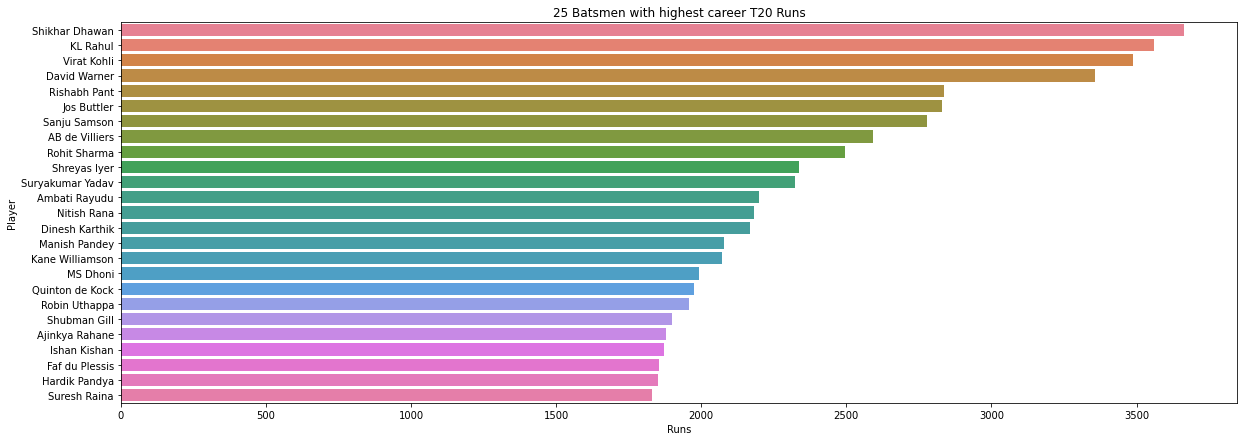

In [31]:
df_most_runs = df_batting_combined_formatted.sort_values(by = ['Runs'], ascending = False)
plt.figure(figsize = (20, 7))
plt.title("25 Batsmen with highest career T20 Runs")
sns.barplot(x = df_most_runs["Runs"], y = df_most_runs["Player"][:25], palette = "husl");

#### 7b. The plot below will visualize the top 25 batsmen based on T20 batting Average.
Because the Average can easily be skewed due to tailenders having a lot of not out innings, I will introduce a minimum balls faced threshold of 200.

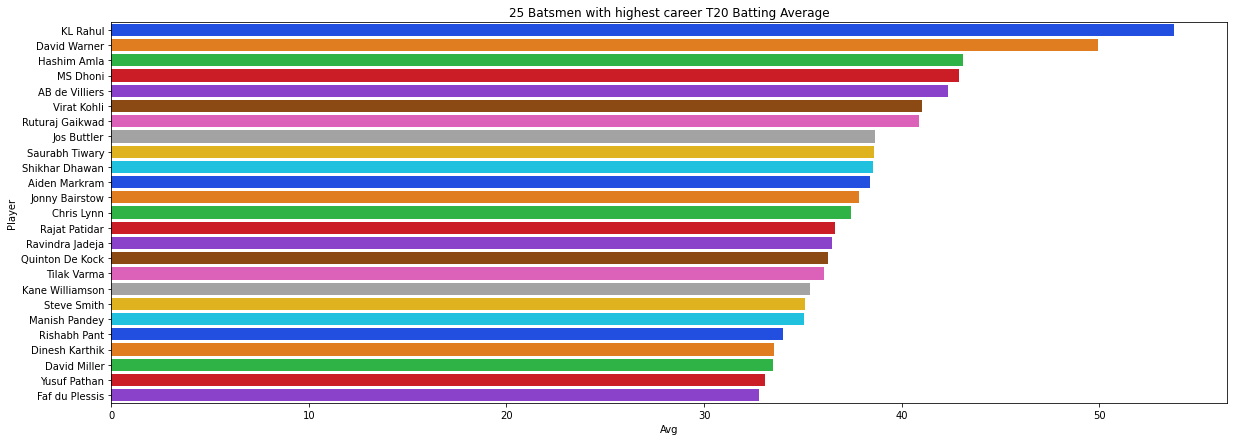

In [32]:
df_highest_avg = df_batting_combined_formatted[df_batting_combined_formatted['BF'] >= 200].sort_values(by = ['Avg'], ascending = False)
plt.figure(figsize = (20, 7))
plt.title("25 Batsmen with highest career T20 Batting Average")
sns.barplot(x = df_highest_avg["Avg"], y = df_highest_avg["Player"][:25], palette = "bright");

#### 7c. The plot below will visualize the top 25 batsmen based on T20 Strike Rate.
Because the Strike Rate can easily be skewed due to tailenders having a lot of pinch hitting innings in very few deliveries, I will introduce a minimum balls faced threshold of 200.

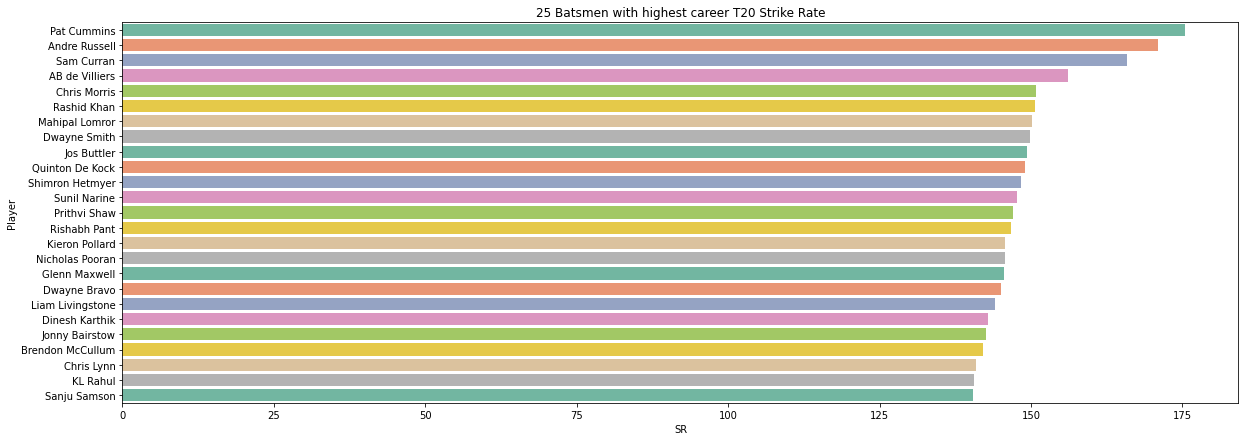

In [33]:
df_highest_strike_rate = df_batting_combined_formatted[df_batting_combined_formatted['BF'] >= 200].sort_values(by = ['SR'], ascending = False)
plt.figure(figsize = (20, 7))
plt.title("25 Batsmen with highest career T20 Strike Rate")
sns.barplot(x = df_highest_strike_rate["SR"], y = df_highest_strike_rate["Player"][:25], palette = "Set2");

After doing a quick scan of the charts above, an acceptable batting average for T20 cricket can be between 30 and 40. So I would first like to view the number of batsmen that have an average over 35. In addition to this, strike rate matters more to a T20 batsman than to any other format so strike rate will also be factored in. An ideal strike rate for a T20 batsman is anything above 130 so that will be our filter.

#### 7d. "Great" batsmen in terms of T20 Average and Strike Rate
Great would be defined as a batsman with an Average greater than 35 and a Strike rate surpassing 130.

In [34]:
df_batting_combined_formatted[(df_batting_combined_formatted['Avg'] >= 35) & (df_batting_combined_formatted['SR'] >= 130)]

,Player,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s,Seasons
0,AB de Villiers,80,77,17,2592,42.34,1629,156.15,1,25,195,148,6
9,Aiden Markram,20,18,5,527,38.42,393,130.86,0,3,37,23,2
55,Chris Lynn,39,39,3,1265,37.41,887,140.90,0,10,126,63,5
69,David Warner,79,79,13,3356,49.92,2368,138.33,2,32,327,113,6
76,Devon Conway,7,7,1,252,42.00,173,145.66,0,3,22,12,1
107,Hashim Amla,16,16,3,577,43.08,407,138.88,2,3,60,21,2
135,Jonny Bairstow,39,39,3,1291,37.83,905,142.59,1,9,133,55,4
136,Jos Buttler,82,81,10,2831,38.67,1891,149.39,5,15,277,135,7
141,KL Rahul,84,82,16,3561,53.78,2549,140.63,4,31,303,156,6
230,Quinton De Kock,15,15,1,508,36.29,341,148.97,1,3,47,23,1


#### 7e. "Exceptional" batsmen in terms of T20 Average and Strike Rate
Exceptional would be defined as batsmen with an average surpassing 40 and a strike rate surpassing 140.

In [35]:
df_batting_combined_formatted[(df_batting_combined_formatted['Avg'] >= 40) & (df_batting_combined_formatted['SR'] >= 140)]

,Player,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s,Seasons
0,AB de Villiers,80,77,17,2592,42.34,1629,156.15,1,25,195,148,6
76,Devon Conway,7,7,1,252,42.00,173,145.66,0,3,22,12,1
141,KL Rahul,84,82,16,3561,53.78,2549,140.63,4,31,303,156,6


#### 7f. Percentage of total 50s scored by a single player
So simply viewing a bar chart of 50s scored will not give us a good picture of how rare it is to score multiple 50s in a T20 career. To better paint a picture, I will calculate the percentage of total 50s scored by all players that a single player has scored and show the 20 players with the highest percentage.

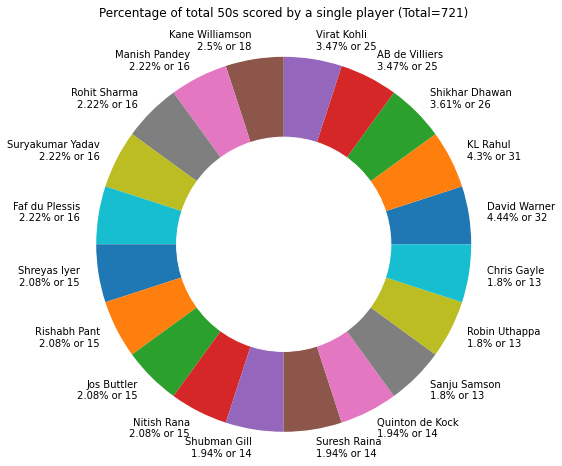

In [36]:
sum_50 = df_batting_combined_formatted["50"].sum()
df_percentage_50 = df_batting_combined_formatted
df_percentage_50["Percentage_50"] = round((df_batting_combined_formatted["50"] / sum_50) * 100, 2)
df_percentage_50 = df_percentage_50.sort_values(by="Percentage_50", ascending=False)
df_percentage_50["custom_label"] = df_percentage_50["Player"] + "\n" + df_percentage_50["Percentage_50"].astype(str) + "% or " + df_percentage_50["50"].astype(str)

plt.figure(figsize = (6, 8))
plt.pie(df_percentage_50[:20].value_counts(), labels=df_percentage_50["custom_label"][:20], radius = 1.4)
circle = plt.Circle((0, 0), 0.8, color='white')
plt.title("Percentage of total 50s scored by a single player (Total=721)", pad=60)
plt.gca().add_artist(circle)
plt.show()

#### 7g. Pie Chart of 100s
So simply viewing a bar chart of 100s scored will not give us a good picture of how rare it is to score a single 100 in a T20 career. To better paint a picture, I will calculate the percentage of total 100s of all players involved that a single player has scored and show the ones with the 25 highest percentage.

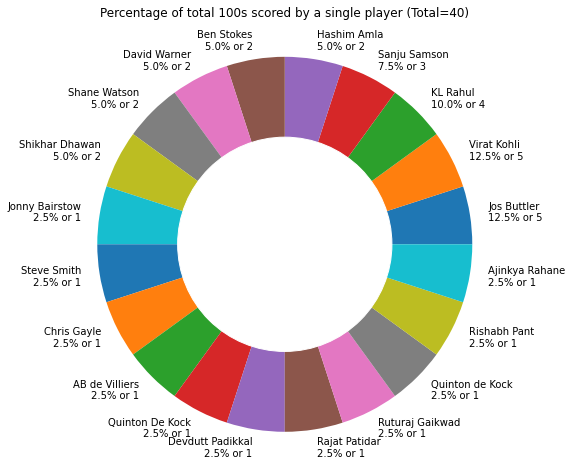

In [37]:
sum_100 = df_batting_combined_formatted["100"].sum()
df_percentage_100 = df_batting_combined_formatted
df_percentage_100["Percentage_100"] = round((df_batting_combined_formatted["100"] / sum_100) * 100, 2)
df_percentage_100 = df_percentage_100.sort_values(by="Percentage_100", ascending=False)
df_percentage_100["custom_label"] = df_percentage_100["Player"] + "\n" + df_percentage_100["Percentage_100"].astype(str) + "% or " + df_percentage_100["100"].astype(str)

plt.figure(figsize = (6, 8))
plt.pie(df_percentage_100[:20].value_counts(), labels=df_percentage_100["custom_label"][:20], radius = 1.4)
circle = plt.Circle((0, 0), 0.8, color='white')
plt.title("Percentage of total 100s scored by a single player (Total=40)", pad=60)
plt.gca().add_artist(circle)
plt.show()

## 8. Trying to understand what variables influence Runs Scored
Before establishing a criteria to determine the best batsmen from a statistical point of view, I wanted to understand which factors can impact the total runs scored. The purpose of this section is to identify what can a batter improve on specifically to influence their runs.

As we saw in the correlation matrix above, the balls faced is strongly correlated to runs scored. The question I want to answer now, does simply facing more balls than everyone else automatically mean you will score more runs than your peers? I will answer this question by plotting the top 25 players based on most balls faced and their corresponding runs. The expected outcome is to see the players with most balls faced will have the most runs.

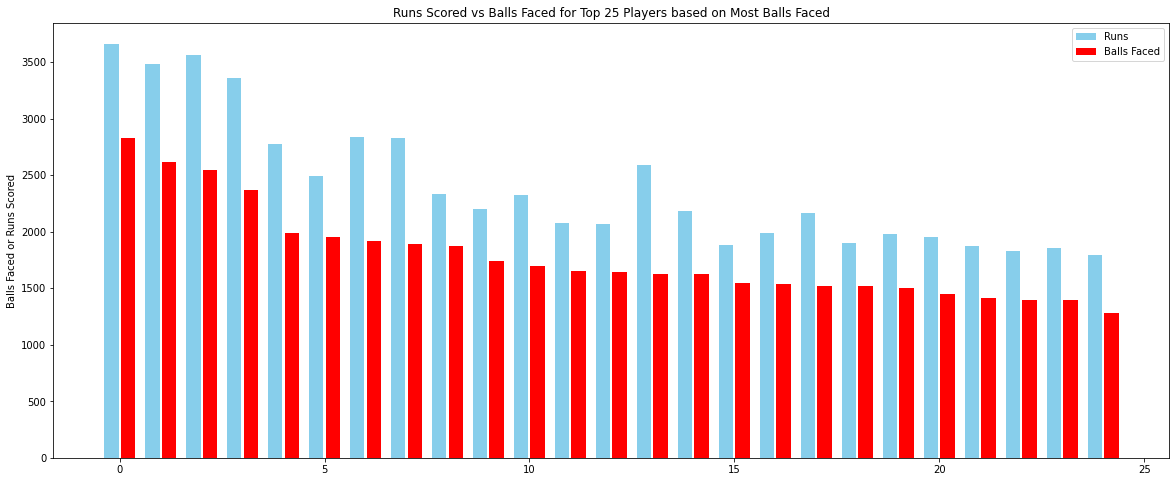

In [42]:
plt.figure(figsize = (20, 8))
x = np.arange(25)
most_balls_faced = df_batting_combined_formatted.sort_values(by="BF", ascending=False)[:25]
plt.bar(x-0.2, most_balls_faced["Runs"], width= 0.35, label='Runs', color='skyblue')
plt.bar(x+0.2, most_balls_faced["BF"], width= 0.35, label='Balls Faced', color='red')

plt.ylabel("Balls Faced or Runs Scored")
plt.legend(["Runs", "Balls Faced"])
plt.title("Runs Scored vs Balls Faced for Top 25 Players based on Most Balls Faced")

plt.show()

What this plot tells us is that the players who face more balls indeed do have a higher chance of scoring more runs. With a few minor exceptions where some players scored a little less than others that faced lesser balls than them, then it is safe to say that increasing the number of balls faced will contribute to more runs scored.

The next question is whether strike rate has an impact on the number of runs scored. For this we will introduce a minimum of 200 balls faced to exclude lower order hitters that may skew the dataset.

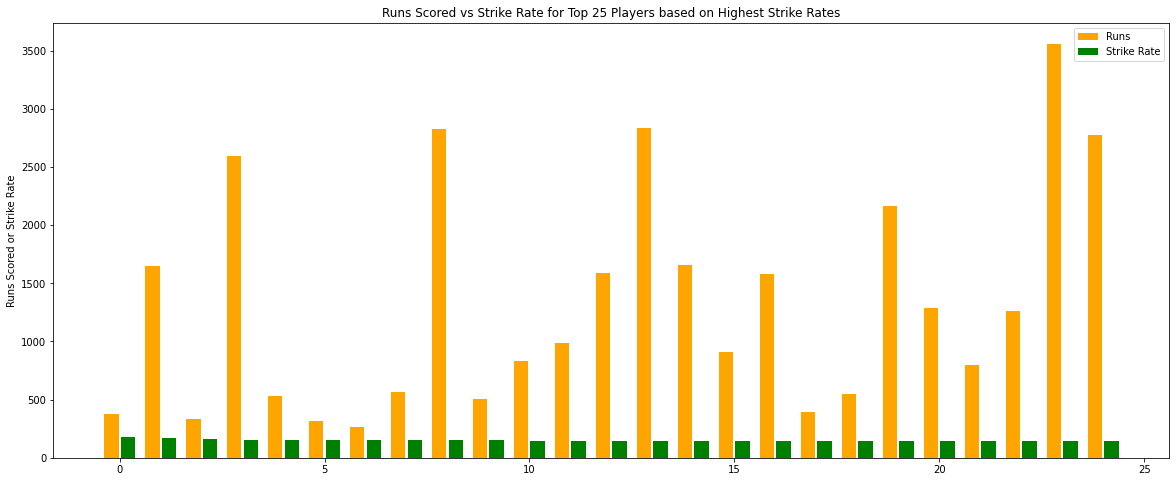

In [43]:
plt.figure(figsize = (20, 8))
x = np.arange(25)
highest_strike_rates = df_batting_combined_formatted[df_batting_combined_formatted["BF"] >=200].sort_values(by="SR", ascending=False)[:25]
plt.bar(x-0.2, highest_strike_rates["Runs"], width= 0.35, label='Runs', color='orange')
plt.bar(x+0.2, highest_strike_rates["SR"], width= 0.35, label='Strike Rate', color='green')

plt.ylabel("Runs Scored or Strike Rate")
plt.legend(["Runs", "Strike Rate"])
plt.title("Runs Scored vs Strike Rate for Top 25 Players based on Highest Strike Rates")

plt.show()

As the chart shows above, the strike rate alone does not have a direct influence on your runs scored or else the chart would look a lot like the one above for balls faced vs runs scored. That being said, strike rate does have an impact on the runs you score since a higher strike rate means more efficient scoring.

Another question I want to pose is whether scoring more boundaries has an impact on the runs scored. To answer this I will count the total number of boundaries scored by a player and then compare them to the runs scored to see if that has a significant impact on the runs scored by a player. My expectation is that more boundaries will be scored by the players with the most runs. The counter argument might be that players that can easily score 2s and 3s may not rely on boundaries as much and may be able to score a lot of runs.

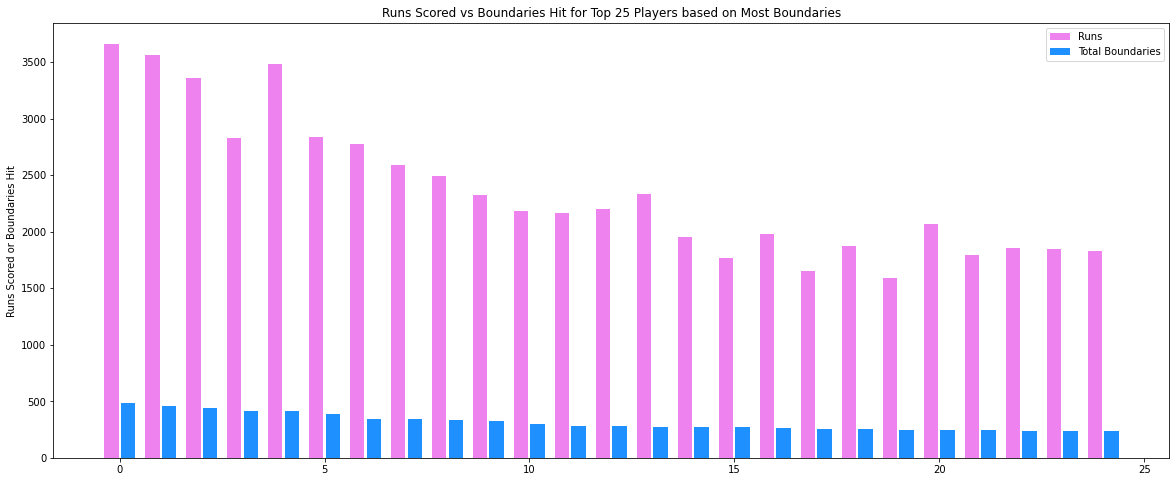

In [47]:
total_boundaries = df_batting_combined_formatted
total_boundaries["total_boundaries"] = df_batting_combined_formatted["4s"] + df_batting_combined_formatted["6s"]

total_boundaries = total_boundaries.sort_values(by="total_boundaries", ascending=False)[:25]

plt.figure(figsize = (20, 8))
x = np.arange(25)
plt.bar(x-0.2, total_boundaries["Runs"], width= 0.35, label='Runs', color='violet')
plt.bar(x+0.2, total_boundaries["total_boundaries"], width= 0.35, label='Total Boundaries', color='dodgerblue')

plt.ylabel("Runs Scored or Boundaries Hit")
plt.legend(["Runs", "Total Boundaries"])
plt.title("Runs Scored vs Boundaries Hit for Top 25 Players based on Most Boundaries")

plt.show()


So scoring more boundaries does have a direct impact on runs scored. As the bar chart shows the more boundaries are hit by players who score the most runs. This is very interesting since it indicates you do not need an insanely high strike rate but just the ability to score boundaries often.

In the same thought as boundaries to runs scored, another interesting question is whether scoring more landmarks such as half centuries and centuries affect runs scored. My expectation is that the more landmarks you have the higher the runs scored. I am expecting a bar chart similiar to the one above for boundaries hit vs runs scored and balls faced vs runs scored.

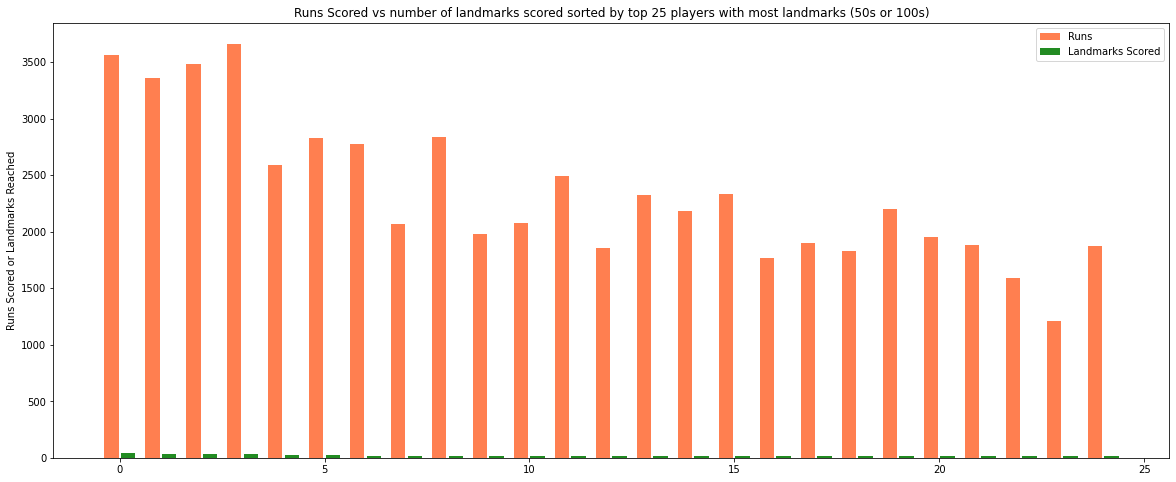

In [50]:
total_landmarks = df_batting_combined_formatted
# Equalling 100 to 2 50s since it holds a bigger weight than a 50.
total_landmarks["total_landmarks"] = df_batting_combined_formatted["50"] + (df_batting_combined_formatted["100"] * 2)

total_landmarks = total_landmarks.sort_values(by="total_landmarks", ascending=False)[:25]

plt.figure(figsize = (20, 8))
x = np.arange(25)
plt.bar(x-0.2, total_landmarks["Runs"], width= 0.35, label='Runs', color='coral')
plt.bar(x+0.2, total_landmarks["total_landmarks"], width= 0.35, label='Total Landmarks', color='forestgreen')

plt.ylabel("Runs Scored or Landmarks Reached")
plt.legend(["Runs", "Landmarks Scored"])
plt.title("Runs Scored vs number of landmarks scored sorted by top 25 players with most landmarks (50s or 100s)")

plt.show()


This one is interesting since it doesn't have the exact same effect as the boundaries hit and balls faced chart. As you can see there is quite some variation in the chart heights and they do not uniformly drop indicating that landmarks achieved does not have a very strong impact on runs scored. What this tells me is that many players may have a lot of scores just below 50 or a lot of scores between 50 and 100 leading to this chart's variation.

The final question I want to answer is a simple one. Does more innings mean more runs? My expectation is that this should be similar to the balls faced vs runs scored chart shown above.

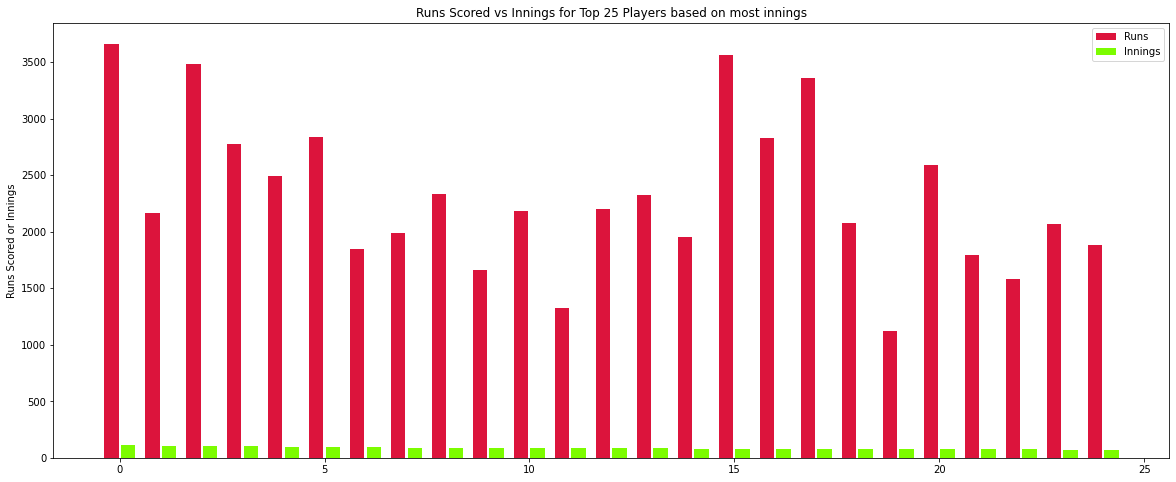

In [53]:
plt.figure(figsize = (20, 8))
x = np.arange(25)
most_innings = df_batting_combined_formatted.sort_values(by="Inns", ascending=False)[:25]
plt.bar(x-0.2, most_innings["Runs"], width= 0.35, label='Runs', color='crimson')
plt.bar(x+0.2, most_innings["Inns"], width= 0.35, label='Innings', color='lawngreen')

plt.ylabel("Runs Scored or Innings")
plt.legend(["Runs", "Innings"])
plt.title("Runs Scored vs Innings for Top 25 Players based on most innings")

plt.show()

So having more innings does not automatically mean having most runs contrary to the balls faced vs runs score chart. Also this was indicated in the correlation matrix results earlier with Innings not being highly correlated to runs scored. The logic I am understanding here is that having many innings does not automatically mean more balls faced especially if you bat lower than the order and only get a few balls per inning to face.

## Creating rating system for T20 batsmen